# Classification

- real life example : email spam detection, medical diagnosis, credit scoring 

# Metric to measure performance 



In [1]:
library(caret)
library(tidyverse)
library(ggplot2)

Loading required package: ggplot2

Loading required package: lattice

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
data(iris)
head(iris)

#Split the data into train set and test set
set.seed(252)
index = createDataPartition(iris$Species, p = 0.75, list = FALSE)
train.dat = iris[index,]
test.dat = iris[-index,]


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


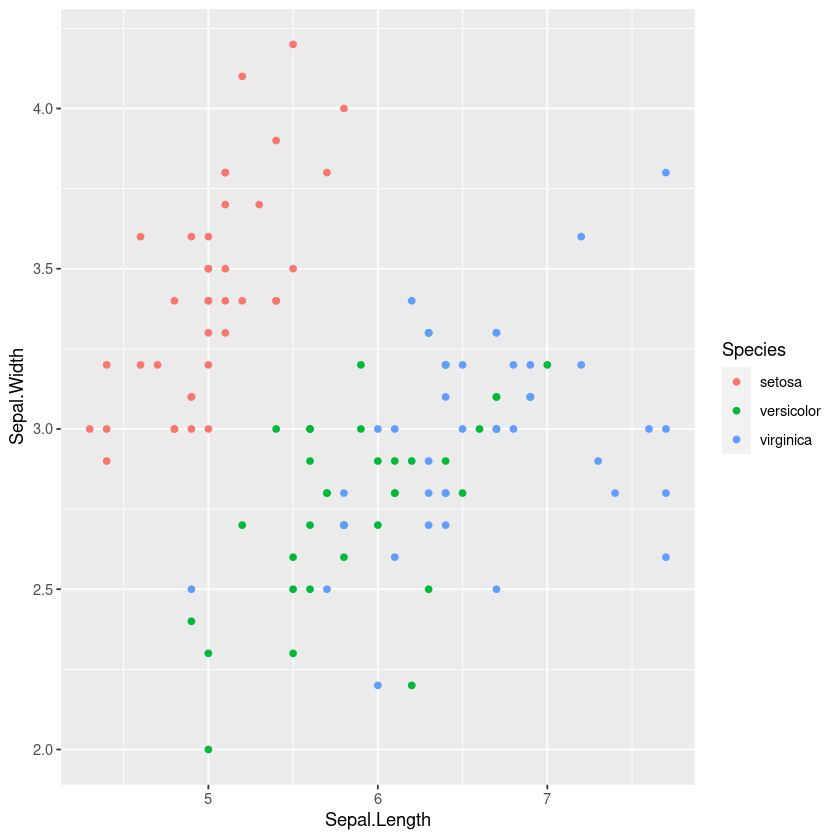

In [4]:
#basic data visualization

ggplot(data=train.dat, aes(x=Sepal.Length, y=Sepal.Width, color=Species)) + geom_point()

In [8]:
set.seed(295)

#cross validation 

cv.control = trainControl(method = "cv", number = 5)

#Create a tuning gird
# hyper parameter : C if the method is "svmLinear"

h_grid = expand.grid(
    C = c(0.25, .35, .5, .55, .6, .7)
)

#train to find the optimal tuning parameters 

SVM.fit0 = train(Species~., data=train.dat, method = "svmLinear",
                 trControl = cv.control,
                 trace = FALSE,
                 #preProcess = c("center", "scale"),
                 tuneGrid = h_grid,
                 #maxit = 500
                 ) 

#best tuning parameters
SVM.fit0$bestTune #.55b

,C
,<dbl>
4,0.55


In [9]:
SVM.fit0

Support Vector Machines with Linear Kernel 

114 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 92, 91, 91, 90, 92 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.25  0.9382740  0.9072309
  0.35  0.9382740  0.9072309
  0.50  0.9556983  0.9333955
  0.55  0.9647892  0.9471026
  0.60  0.9647892  0.9471026
  0.70  0.9466074  0.9197734

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was C = 0.55.

In [10]:
#Make prediction for classfication on the test data
#make prediction of classes
p.class = predict(SVM.fit0, newdata =test.dat)

#The predicted class based on the features
p.class

#Make prediction of prob , if it is a binary classfication
#predict(SVM.fit0, newdata = test.dat, type = "prob")
#Confusion matrix
confusionMatrix(p.class, reference = test.dat$Species)
# Accuracy = 1 (perfect classfication)


[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] versicolor versicolor versicolor versicolor versicolor versicolor
[19] versicolor versicolor versicolor versicolor versicolor versicolor
[25] virginica  virginica  virginica  virginica  virginica  virginica 
[31] virginica  virginica  virginica  virginica  virginica  virginica 
Levels: setosa versicolor virginica

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         12          0         0
  versicolor      0         12         0
  virginica       0          0        12

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9026, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3333            

In [15]:
set.seed(232)
#train to find the optimal tuning parameters 
SVM.fit2 = train(Species~., data=train.dat, method = "svmPoly",
                 trControl = cv.control,
                 trace = FALSE,
                 preProcess = c("center", "scale"),
                 trueLength = 8
                 #maxit = 500
                 )

#SVM.fit2

# The best tuning parameters
SVM.fit2$bestTune

,degree,scale,C
,<int>,<dbl>,<dbl>
9,1,0.1,1


In [18]:
set.seed(232)
# hyper parameter : C if the method is "svmLinear"
h_grid = expand.grid (degree = 1:5, scale = c(0.05,0.1,0.2,0.3), C=c(0.25, .5, .7, 1.0))

SVM.fit3 = train( Species ~ ., data = train.dat, method = "svmPoly",
 trControl = cv.control,
 trace = FALSE,
 tuneGrid = h_grid,
 preProc = c("center", "scale")
 # maxit = 500
 )

#The best tuning paramter
SVM.fit3$bestTune

,degree,scale,C
,<int>,<dbl>,<dbl>
13,1,0.3,0.25


In [19]:
#Make prediction for classfication on the test data
#make prediction of classes
p.class = predict(SVM.fit3, newdata =test.dat)
#The predicted class based on the features
p.class
#Make prediction of prob , if it is a binary classfication
#predict(SVM.fit0, newdata = test.dat, type = "prob")
#Confusion matrix
confusionMatrix(p.class, reference = test.dat$Species)
# Accuracy = 1 (perfect classfication)


[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] versicolor versicolor versicolor versicolor versicolor versicolor
[19] versicolor versicolor versicolor versicolor versicolor versicolor
[25] virginica  virginica  virginica  virginica  virginica  virginica 
[31] virginica  virginica  virginica  virginica  virginica  virginica 
Levels: setosa versicolor virginica

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         12          0         0
  versicolor      0         12         0
  virginica       0          0        12

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9026, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3333            

In [20]:
#Make prediction for classfication on the test data
#make prediction of classes
p.class = predict(SVM.fit2, newdata =test.dat)
#The predicted class based on the features
p.class
#Make prediction of prob , if it is a binary classfication
#predict(SVM.fit0, newdata = test.dat, type = "prob")
#Confusion matrix
confusionMatrix(p.class, reference = test.dat$Species)
# Accuracy = 1 (perfect classfication)


[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     setosa     setosa     setosa    
[13] versicolor versicolor versicolor versicolor versicolor versicolor
[19] versicolor versicolor versicolor versicolor versicolor versicolor
[25] virginica  virginica  virginica  virginica  virginica  virginica 
[31] virginica  virginica  virginica  virginica  virginica  virginica 
Levels: setosa versicolor virginica

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         12          0         0
  versicolor      0         12         0
  virginica       0          0        12

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.9026, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3333            